# Basic Image Processing Techniques

Before we get into actually recognizing parts of images, we need a few basic techniques we can perform on raw images. For now, these might seem somewhat random, but they are all very important parts of the larger process, as we will see later on in the workshop.

## Blurring

This is sometimes referred to as "smoothing" an image. This will end up being helpful when we try to get rid of extraneous "noise" in a picture.

Lets return to our ladybug image from the last workshop section.

In [7]:
import cv2

img_color = cv2.imread("ladybug.png", cv2.IMREAD_COLOR)

cv2.imshow("Color ladybug!", img_color)
cv2.waitKey(0)

-1

### Standard Blur

We have a couple of options for how we want to go about blurring our image. We'll start with OpenCV's standard "blur" feature, `cv2.blur`

In [8]:
blur_img_1 = cv2.blur(img_color,(3,3))

cv2.imshow("Blurred ladybug", blur_img_1)
cv2.waitKey(0)

-1

`cv2.blur` has two parameters: the image you want to blur, and the size for something that we call a **kernel**. If you don't care to learn how this works, feel free to just skip ahead. All you really *need* to know is that the larger numbers you put here, the more blurred your image will appear.

When we put (3,3) in the second parameter spot, the program is using a 3x3 matrix to perform a blur. 

$ \frac{1}{9} * 
\begin{bmatrix} 
1 & 1 & 1 \\ 
1 & 1 & 1 \\ 
1 & 1 & 1 \\ 
\end{bmatrix}$

This matrix is applied to each individual pixel within the image. This means that for each pixel, the matrix is applied to the surrounding area, and then the pixel is replaced with the average value.

So if we increase the kernel to (5,5), this is what the matrix will look like:

$ \frac{1}{25} *
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1  
\end{bmatrix}  $

Let's try increasing the kernel size by a significant amount, just so it's obvious to see that the image gets blurrier as the kernel size increases. The following code shows the original image, the slightly burred image with the 3x3 matrix, and a significantly blurred image with a 15x15 matrix.

In [9]:
blur_img_2 = cv2.blur(img_color,(15,15))

cv2.imshow("Color ladybug!", img_color)
cv2.waitKey(0)

cv2.imshow("Blurred ladybug", blur_img_1)
cv2.waitKey(0)

cv2.imshow("Blurred ladybug", blur_img_2)
cv2.waitKey(0)

-1

### Gaussian Blur

An incredibly common method of blurring images in computer vision is called a **Gaussian Blur**. This works similarly to the normalized blur we saw earlier, by applying a matrix to each pixel in an image.

$ \frac{1}{256} *
\begin{bmatrix}
1 & 4 & 6 & 4 & 1 \\
4 & 16 & 24 & 16 & 4 \\
6 & 24 & 36 & 24 & 6 \\
4 & 16 & 24 & 16 & 4 \\
1 & 4 & 6 & 4 & 1 
\end{bmatrix}  $

The idea behind this is to give surrounding pixels different weights based on proximity to the current pixel. So the central pixel is weighed the highest, with the immediately surrounding pixels having the next highest amount of influence.

Below we show examples of Gaussian blurs in cv2 using the built-in `cv2.GaussianBlur` method.

In [10]:
blur_img_3 = cv2.GaussianBlur(img_color,(5,5),0)
blur_img_4 = cv2.GaussianBlur(img_color,(15,15),0)

cv2.imshow("Blurred ladybug", img_color)
cv2.waitKey(0)

cv2.imshow("Blurred ladybug", blur_img_3)
cv2.waitKey(0)

cv2.imshow("Blurred ladybug", blur_img_4)
cv2.waitKey(0)

-1

Below are the original image, normalized blur, and gaussian blur next to each other so you can clearly see the difference between types of blurs

In [11]:
cv2.imshow("Blurred ladybug", img_color)
cv2.waitKey(0)

cv2.imshow("Blurred ladybug", blur_img_2)
cv2.waitKey(0)

cv2.imshow("Blurred ladybug", blur_img_4)
cv2.waitKey(0)

-1

The specific advantages and disadvantages of both can be somewhat complicated and involve a lot of difficult math. However, in simple terms, it's frequently said that a Guassian blur "smooths out the image" as opposed to completely blurring it the way that the normalized blur does. To see this clearly, look at the antennae of the ladybug in the previous example. With the regular blur, the antennae seem to vanish almost completely in some areas, whereas with the Gaussian blur, we can still see the clear outlines.

## Scaling

Something fairly simple thats frequently used in image processing is scaling (or resizing) an image. Fortunately, OpenCV has built in tools for this!

We can use `cv2.resize` to resize the image to our new dimensions. Below is some simple python code to calculate a scale percentage. Here we use 60, as in the new image will be 60% the size of the old image.

In [12]:
img_temp = cv2.imread("ladybug.png", cv2.IMREAD_COLOR)

scale_percent = 60
width = int(img_temp.shape[1] * scale_percent / 100)
height = int(img_temp.shape[0] * scale_percent / 100)
dim = (width, height)

resized = cv2.resize(img_temp, dim)

cv2.imshow("Resized ladybug!", resized)
cv2.waitKey(0)

-1

We can also scale the image up to be larger than the original. (You might notice a significant decrease in image quality this way.)

In [13]:
scale_percent = 150
width = int(img_temp.shape[1] * scale_percent / 100)
height = int(img_temp.shape[0] * scale_percent / 100)
dim = (width, height)

resized_2 = cv2.resize(img_temp, dim)

cv2.imshow("Resized ladybug!", resized_2)
cv2.waitKey(0)

-1

We can also manually set dimensions; however, without keeping the scale, the resulting image may look a bit strange!

In [15]:
dim = (200, 200)

resized_3 = cv2.resize(img_temp, dim)

cv2.imshow("Resized ladybug!", resized_3)
cv2.waitKey(0)

-1

## Adjusting Contrast

One other important thing we can do to an image is increase the contrast. For the sake of this workshop, we will be doing this in grayscale images.

Let's take a grayscale version of our ladybug image.

In [19]:
img_gray = cv2.imread("ladybug.png", cv2.IMREAD_GRAYSCALE)

cv2.imshow("Gray ladybug!", img_gray)
cv2.waitKey(0)

-1

Below is code to plot how many of each value pixel there are. (You don't need to worry about understanding the line of code. We are using the plots simply to have a helpful visualization for what is actually going on behind the scenes of this method. In the future, you won't need to print out the plot.)

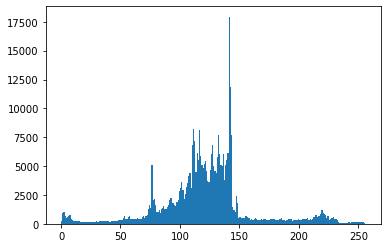

In [18]:
import numpy as np
from matplotlib import pyplot as plt

plt.hist(img_gray.ravel(),256,[0,256]); plt.show()

As you can see, there are a very large number of pixels clumped between 100 and 150. Recall that on a grayscale image, all the pixels are from values 0 to 255, with zero being black and 255 being white. From the plot, we can see that there are very few pixels that can be called either "very dark" or "very light."

We're now going to use a method called "histogram equalization." In cv2, this is called `cv2.equalizeHist`.

In [22]:
equalized_img = cv2.equalizeHist(img_gray)

cv2.imshow("Gray ladybug!", equalized_img)
cv2.waitKey(0)

-1

As you can see, the image looks very different! Let's re-examine the histogram.

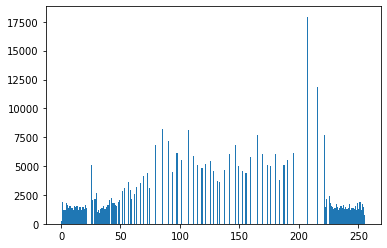

In [23]:
plt.hist(equalized_img.ravel(),256,[0,256]); plt.show()

There should be a very clear difference! Now, instead of most of the pixels being clumped between 100-150, they are much more spreadout throughout the gray scale. This is going to help us a lot in future steps.